In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division 
from scipy import stats
from scipy.stats import maxwell

In [ ]:
## global variables and parameters
l = 20 #length of m1's chamber
m1 = 12
m2 = 8
m = m1+m2

## billiard representation
l2 = l*(m2/m)**(1/2) # when the position of the second billiard, represented by y, is in (0,l1), m2 is in the entry chamber, also the billiard (x,y) is in the triangle area
l1 = l*(m1/m)**(1/2)
theta = np.arctan((m2/m1)**(1/2)) # angle between the hypotenuse and the top side
print(l1,l2)

# normal distribution of v1
mu = 0 # velocity can be positive or negative, define the positive direction to be the right
sigma = 10

# three points of the triangle
left_top = [0,l2]
bottom = [0,0]
right_top = [l1,l2]


15.491933384829668 12.649110640673518


In [ ]:
def line(p1, p2): # input list, [0] is x, [1] is y
    A = (p1[1] - p2[1]) # delta y
    B = (p2[0] - p1[0]) # delta x
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

'''
Input: two lines, both are 3-element tuples
Return: one 2-element tuple or False
'''
def intersection(L1, L2): # input two lines
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    # print(D)
    if D != 0:
        x = Dx / D
        y = Dy / D
        # print('case 1')
        return x,y
    else:
        
        # print('case 2')
        return False

Source: https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines

In [ ]:
def angle(vector_1, vector_2): # input two vectors [x,y]
    unit_vector_1 = vector_1 / np. linalg. norm(vector_1)
    unit_vector_2 = vector_2 / np. linalg. norm(vector_2)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    return angle # in radians

In [ ]:
left = line(left_top, bottom)
top = line(left_top, right_top)
hypo = line(bottom, right_top)
'''
determine where the next collision will be.
input: current x,y,v1,v2
return: v2
'''
def collide(x,y,v1,v2):
    while True:
        x_list.append(x)
        # x_alt.append(x)
        y_list.append(y)
        # y_alt.append(y)
        p1 = [x,y]
        p2 = [x+v1,y+v2]
        # x_alt.append(p2[0])
        # y_alt.append(p2[1])
        way = line(p1,p2) # the intended straight-line motion

        # which side will the velocity vector intersect, within the range of the triangle
        xLeft = intersection(way, left)
        alreadyHit = False
        if xLeft:
            if xLeft[0]==0 and xLeft[1]<l2 and xLeft[1]>0 and v1<0: 
                alreadyHit = True
                x = xLeft[0]
                y = xLeft[1]
                v1,v2 = hitLeft(v1,v2) # velocity after collision
                # print("v1,v2 after colliding with left is ", v1,v2)                    

        xTop = intersection(way, top)
        # print("xTop: ",xTop)
        if xTop:
            if xTop[0]<l1 and xTop[0]>0 and v2>0:
                alreadyHit = True
                x_list.append(xTop[0])
                y_list.append(xTop[1])
                # out, record the exiting v2
                # v2_seq.append(v2)
                # print("out:",v2)
                break
                
        xHypo = intersection(way, hypo)
        if xHypo: # incase the vector is parallel to hypo and xhypo is a boolean
            if xHypo[0]<l1 and xHypo[0]>0 and xHypo[1]<l2 and xHypo[1]>0 and alreadyHit == False: # assumption: the line only intersects with one of the three sides within the range
                x = xHypo[0]
                y = xHypo[1]
                v1,v2 = hitHypo(v1,v2) # velocity after collision
                # print("v1,v2 after colliding with hypotenuse is ",v1, v2)

    # after exiting the while loop            
    return v2


In [ ]:
'''
Given the collision position and a velocity vector, find the reflected velocity.
Input: v1, v2
Output: v1, v2
'''
def hitHypo(v1,v2):
    # find new velocity
    V = (v1**2+v2**2)**(1/2) # norm of velocity
    upHyp = [l1,l2] # vector in the up direction along the hypotenuse
    vector_v = [v1,v2]
    intersection_angle = angle(vector_v,upHyp)
    beta = np.pi - intersection_angle - theta
    v1 = -np.cos(beta)*V
    v2 = np.sin(beta)*V
    return v1,v2
    
def hitLeft(v1,v2):
    # find new velocity
    v1 = -v1
    return v1,v2

In [ ]:
'''
Initialize m1 by choosing its position and velocity from uniform distribution and normal distribution respectively.
Returns the position and velocity of m1.
'''
mu,sigma_1,sigma_2 = 0,50,5
def activateM1():
    x = random.uniform(0,l1) # generate a position within the range (0,l1)
    v1 = random.gauss(mu, sigma_1)
    return x,v1

def activateM3():
    x3 = random.uniform(0,l1) # generate a position within the range (0,l1)
    v3 = random.gauss(mu, sigma_2) # mu, sigma
    return x3,v3

In [ ]:
def simulation(initial_v2,n):
    v2 = initial_v2
    for i in range(n):
        x,v1 = activateM1()
        temp = collide(x,l2,v1,v2)
        v2_seq.append(temp)
        v2 = -temp

    if n==1: # visualize the first trajectory
        plt.plot([0,0,l1,0],[l2,0,l2,l2])
        plt.plot(x_list,y_list)
        # plt.plot(x_alt,y_alt,color='red')
        
    return v2_seq


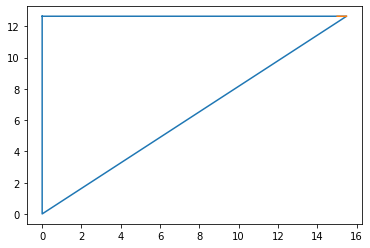

In [ ]:
# visualization
v2_seq = []
x_list = []
y_list = []
results = simulation(-1,1) # v2 should always be negative

In [ ]:
# distribution
v2_seq = []
results = simulation(-1,100000) # v2 should always be negative
plt.hist(results, 100)


In [ ]:
print(results)

[75.19973518079539, 60.463871738659186, 16.207510530018723, 17.997993539335265, 31.096434677964236, 82.30321101242767, 83.1054819546574, 93.40229181587223, 68.85312911772354, 68.29322569476481, 39.0200972742854, 42.42451914269316, 38.25692337447835, 44.34364381981617, 113.00086354310852, 126.0378313967337, 31.69545834889592, 29.782836510741504, 44.641492391518526, 56.43323351656274, 56.98483840527243, 94.45880240821626, 39.107973240927436, 37.39629916102619, 4.423319286326051, 19.389057443314126, 21.04238764318619, 28.79159611124066, 19.751620640849115, 83.10690368465238, 27.5811000886078, 48.44029038130915, 50.97908812229124, 39.72658858703249, 49.661074339581205, 97.15861173784681, 106.82332306155143, 110.66441785934441, 149.24566913399568, 148.27313687758854, 156.43382620698938, 79.75171152801305, 93.01454011096766, 97.42604429854157, 79.0812607954897, 154.52716916867195, 52.51083384488694, 88.57561709822055, 18.494239671917118, 38.183110166871536, 31.43631438036987, 45.358525824864

14.84914137379752
23.695801286664185
-23.695801286664185
----------Now test--------------------
0.001471084331465517
10.033277526128002


(array([1.100e+01, 5.300e+01, 1.160e+02, 1.790e+02, 2.810e+02, 3.900e+02,
        5.310e+02, 6.600e+02, 7.450e+02, 9.360e+02, 1.126e+03, 1.306e+03,
        1.492e+03, 1.625e+03, 1.705e+03, 1.924e+03, 2.034e+03, 2.203e+03,
        2.413e+03, 2.423e+03, 2.717e+03, 2.633e+03, 2.846e+03, 2.876e+03,
        2.875e+03, 2.996e+03, 2.975e+03, 2.905e+03, 2.957e+03, 2.883e+03,
        2.864e+03, 2.788e+03, 2.827e+03, 2.721e+03, 2.556e+03, 2.432e+03,
        2.401e+03, 2.376e+03, 2.246e+03, 2.119e+03, 2.027e+03, 1.841e+03,
        1.776e+03, 1.646e+03, 1.599e+03, 1.404e+03, 1.338e+03, 1.212e+03,
        1.122e+03, 1.029e+03, 9.530e+02, 8.680e+02, 7.670e+02, 7.560e+02,
        6.810e+02, 5.650e+02, 5.470e+02, 4.930e+02, 3.950e+02, 3.640e+02,
        3.430e+02, 2.860e+02, 2.540e+02, 2.260e+02, 1.790e+02, 1.620e+02,
        1.600e+02, 1.370e+02, 1.090e+02, 8.600e+01, 9.100e+01, 7.400e+01,
        5.100e+01, 5.000e+01, 4.900e+01, 3.100e+01, 3.700e+01, 2.200e+01,
        1.900e+01, 2.000e+01, 1.700e+0

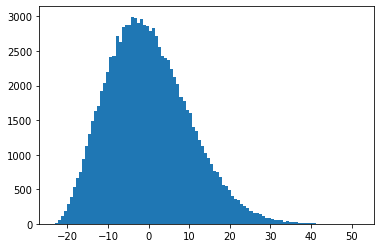

In [ ]:
# # ks test
# a = sigma * np.sqrt(np.pi/(3.0*np.pi - 8.0))
# print(a)

# m = 2.0*a*np.sqrt(2.0/np.pi)
# print(m) # as if loc=0

# loc = mu - m
# print(loc)

# print("----------Now test--------------------")

# # sampling
# q = maxwell.rvs(loc=loc, scale=a, size=100000) # a maxwell-boltzmann distribution, type: np array

# print(np.mean(q))
# print(np.std(q))
# plt.hist(q,100)

To-do: try plotting the pdf of MB using mu and sigma

In [ ]:
# # stats.kstest(results, q)
# stats.kstest(results, 'maxwell') # returns ks test statistic and p value
# stats.ks_2samp(results, q)

Ks_2sampResult(statistic=0.60024, pvalue=0.0)

In [ ]:
# two temperature system
def simulation2(initial_v2,n):
    v2 = initial_v2
    for i in range(n):
        x,v1 = activateM1()
        temp = collide(x,l2,v1,v2)
        v2_seq.append(temp)
        v2 = -temp # make sure any input v2 is negative

        # collide with m3 (m3 has the same mass as m1)
        x3,v3 = activateM3()
        temp = collide(x3,l2,v3,v2) # in the reverse direction
        v2_seq.append(temp)
        v2 = -temp
        
    return v2_seq

average:  41.37263341364128


(array([9.540e+02, 2.794e+03, 4.658e+03, 6.106e+03, 7.042e+03, 7.552e+03,
        7.605e+03, 7.399e+03, 6.917e+03, 6.414e+03, 6.021e+03, 5.630e+03,
        5.147e+03, 4.671e+03, 4.456e+03, 4.341e+03, 4.246e+03, 4.140e+03,
        4.055e+03, 4.052e+03, 3.894e+03, 3.783e+03, 3.700e+03, 3.704e+03,
        3.596e+03, 3.491e+03, 3.510e+03, 3.370e+03, 3.269e+03, 3.362e+03,
        3.214e+03, 3.061e+03, 2.980e+03, 2.937e+03, 2.852e+03, 2.756e+03,
        2.501e+03, 2.535e+03, 2.361e+03, 2.297e+03, 2.127e+03, 2.022e+03,
        1.991e+03, 1.911e+03, 1.833e+03, 1.680e+03, 1.600e+03, 1.445e+03,
        1.425e+03, 1.259e+03, 1.220e+03, 1.088e+03, 1.058e+03, 1.037e+03,
        9.040e+02, 8.710e+02, 7.770e+02, 7.030e+02, 6.310e+02, 6.280e+02,
        5.590e+02, 5.080e+02, 4.970e+02, 4.760e+02, 4.120e+02, 3.390e+02,
        3.410e+02, 3.420e+02, 3.140e+02, 2.650e+02, 2.230e+02, 2.190e+02,
        2.010e+02, 1.830e+02, 1.730e+02, 1.510e+02, 1.300e+02, 1.270e+02,
        1.040e+02, 1.150e+02, 6.300e+0

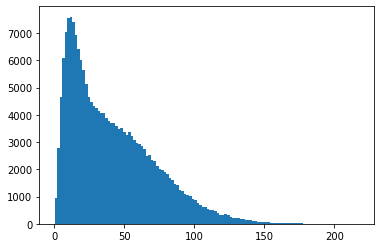

In [ ]:
# distribution
v2_seq = []
results = simulation2(-1,100000) # v2 should always be negative
print("average: ",np.average(results))
plt.hist(results, 120)